In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import plotly.express as px
import plotly.offline as pyo
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('insurance.csv', encoding='utf-8')

In [4]:
#EDA
df.shape

(1339, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1339 non-null   int64  
 1   sex       1339 non-null   object 
 2   bmi       1339 non-null   float64
 3   children  1339 non-null   int64  
 4   smoker    1339 non-null   object 
 5   region    1339 non-null   object 
 6   charges   1339 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.4+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1339.000000,1339.000000,1339.000000,1339.000000
mean,39.223301,30.662207,1.094100,13282.275094
std,14.057331,6.096063,1.205414,12113.252330
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4742.306100
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.687500,2.000000,16717.010750
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

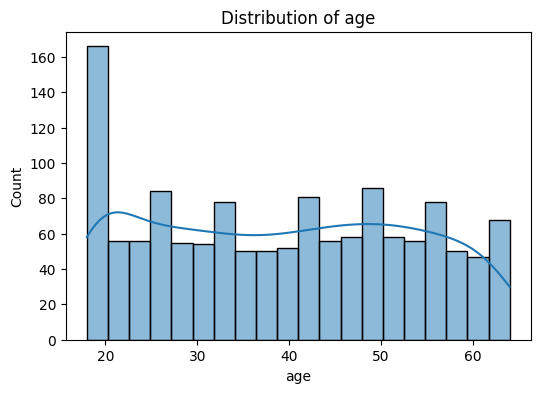

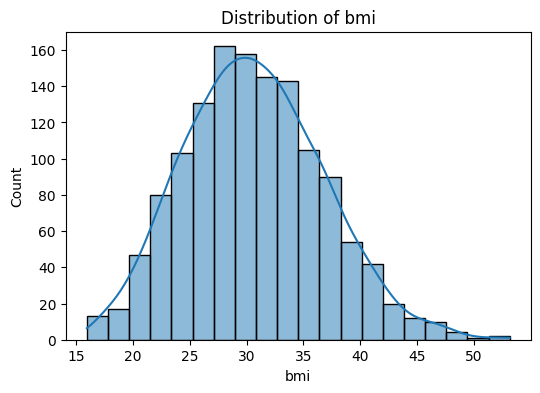

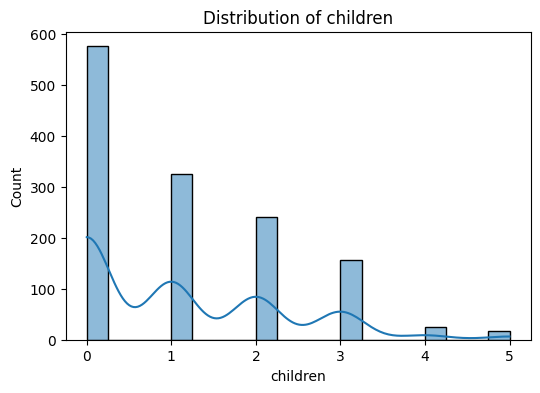

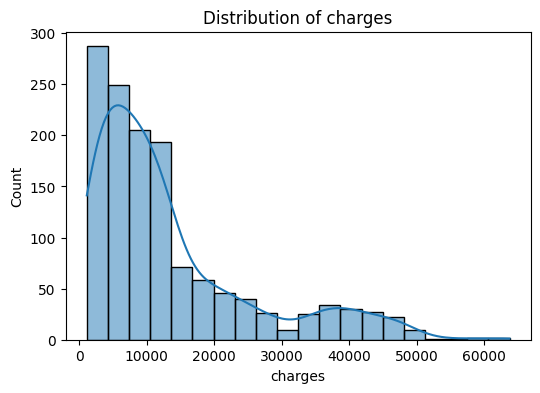

In [10]:
numeric_column = [  'age', 'bmi', 'children', 'charges']
for col in numeric_column:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

In [11]:
#sns.countplot(x= df["children"])
px.box(df, x="smoker", y="charges", color="smoker", title="Charges by Smoker Status")

<Axes: xlabel='sex', ylabel='count'>

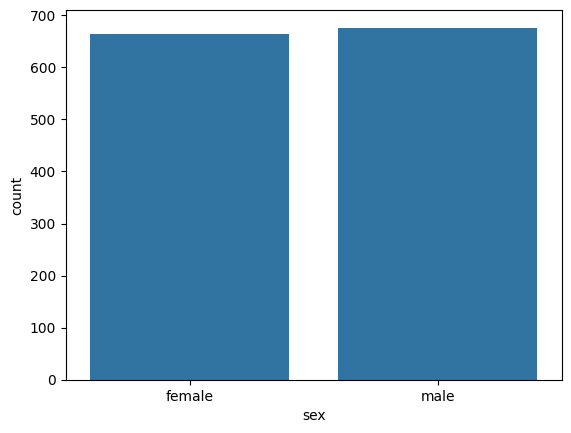

In [12]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

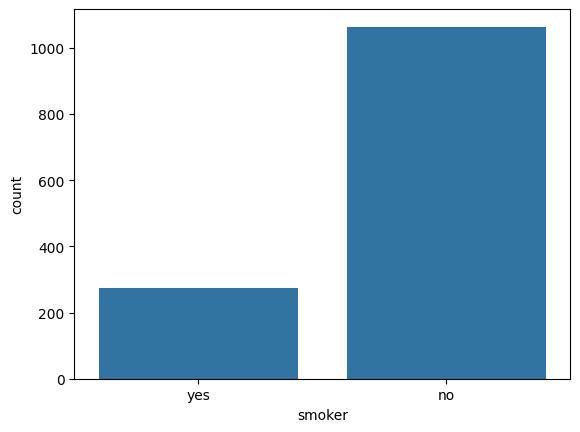

In [13]:
sns.countplot(x=df['smoker'])

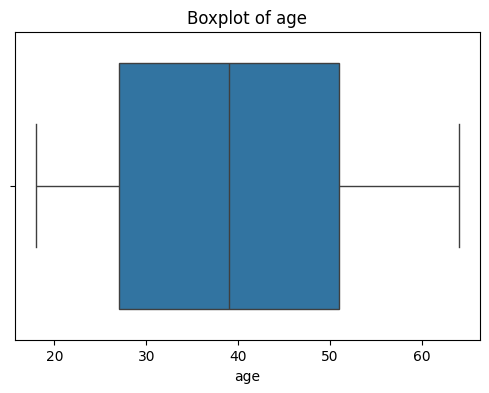

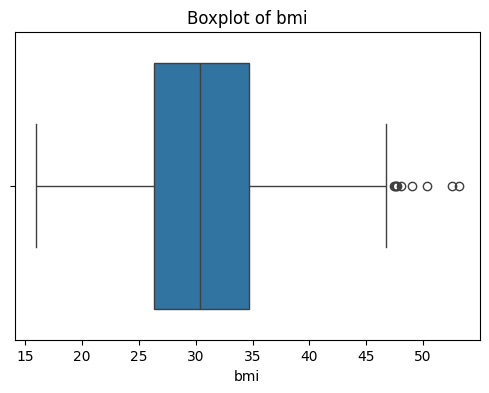

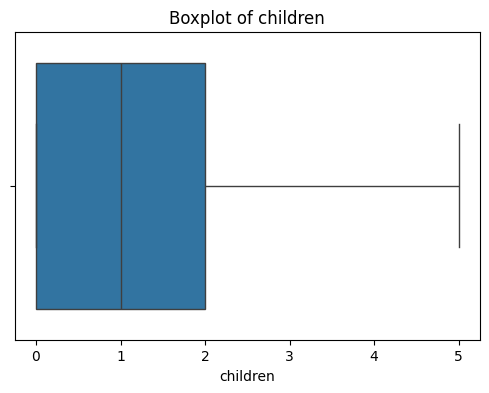

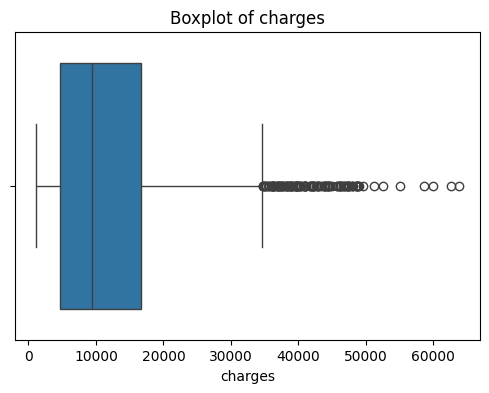

In [14]:
for columns in numeric_column:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[columns])
    plt.title(f'Boxplot of {columns}')
    plt.show()

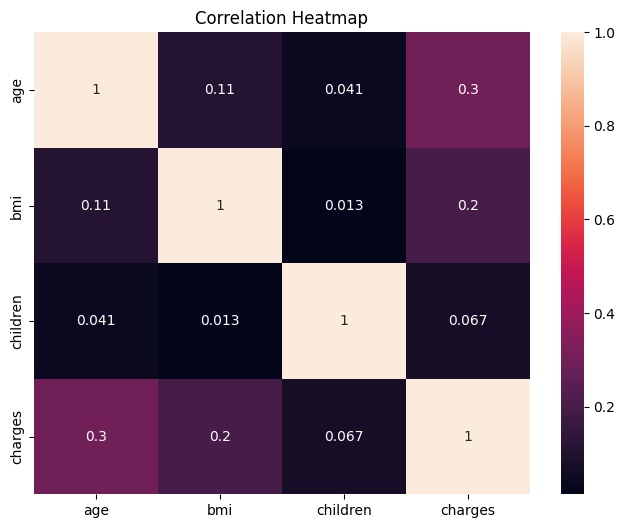

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
#Data cleaning and processing
df_cleaned = df.copy()



In [17]:
df_cleaned.head()
df_cleaned.shape

(1339, 7)

In [18]:
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.shape

(1337, 7)

In [19]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [21]:
df_cleaned["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [22]:
#label encoding
df_cleaned['sex']= df_cleaned['sex'].map({'male':0, 'female':1})

In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 83.6+ KB


In [24]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({'yes':1, 'no':0})

In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 83.6+ KB


In [26]:
df_cleaned.rename(columns={'sex': 'is_female', 'smoker': 'is_smoker'}, inplace=True)

In [27]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [28]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [29]:
#one hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=['region'])

In [30]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [31]:
df_cleaned = df_cleaned.astype("int")

In [32]:
df_cleaned.head()


,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,0,1
1,18,0,33,1,0,1725,0,0,1,0
2,28,0,33,3,0,4449,0,0,1,0
3,33,0,22,0,0,21984,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0


In [33]:
#Feature Engineering and extraction
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

<Axes: xlabel='bmi', ylabel='Count'>

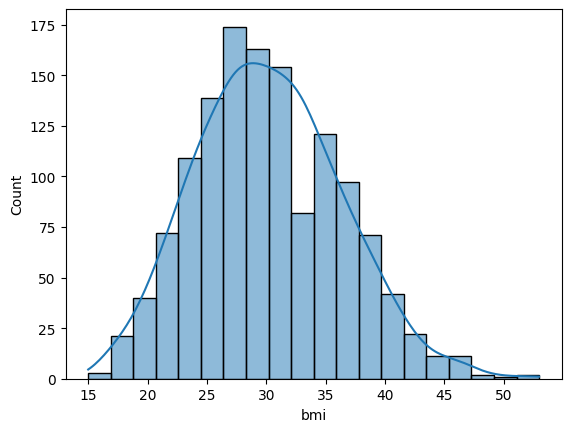

In [34]:
sns.histplot(df_cleaned['bmi'], kde=True, bins=20)

In [35]:
df_cleaned['BMI_category'] = pd.cut(df_cleaned['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])

In [36]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,BMI_category
0,19,1,27,0,1,16884,0,0,0,1,Overweight
1,18,0,33,1,0,1725,0,0,1,0,Obesity
2,28,0,33,3,0,4449,0,0,1,0,Obesity
3,33,0,22,0,0,21984,0,1,0,0,Normal weight
4,32,0,28,0,0,3866,0,1,0,0,Overweight


In [37]:
#hot encoding BMI category
df_cleaned = pd.get_dummies(df_cleaned, columns=['BMI_category'])

In [38]:
df_cleaned = df_cleaned.astype("int")

In [39]:
#Features scaling
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'BMI_category_Underweight',
       'BMI_category_Normal weight', 'BMI_category_Overweight',
       'BMI_category_Obesity'],
      dtype='object')

In [40]:
#preprocessing
cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [41]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,BMI_category_Underweight,BMI_category_Normal weight,BMI_category_Overweight,BMI_category_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,0,1,0,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,0,1,0,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,0,1,0,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,1,0,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,1,0,0,0,0,1,0


In [42]:
#features extraction
from scipy.stats import pearsonr
selected_features = ['age', 'bmi', 'children', 'is_smoker', 'region_northwest', 'region_southeast', 'region_southwest', 'BMI_category_Normal weight', 'BMI_category_Overweight', 'BMI_category_Obesity']

correaltions = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0] 
    for feature in selected_features
}
correaltion_df = pd.DataFrame(list(correaltions.items()), columns=['Feature', 'Pearson_Correlation'])
correaltion_df.sort_values(by='Pearson_Correlation', ascending=False)

,Feature,Pearson_Correlation
3,is_smoker,0.787234
0,age,0.298309
9,BMI_category_Obesity,0.200348
1,bmi,0.196236
5,region_southeast,0.073577
2,children,0.067390
4,region_northwest,-0.038695
6,region_southwest,-0.043637
7,BMI_category_Normal weight,-0.104042
8,BMI_category_Overweight,-0.120601


In [43]:
category_features = ['is_female','is_smoker', 'region_northwest', 'region_southeast', 'region_southwest', 'BMI_category_Normal weight', 'BMI_category_Overweight', 'BMI_category_Obesity'] 



In [44]:
from scipy.stats import chi2_contingency
import pandas as pd


alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)

chi2_results = {}

for col in category_features:
    contingency_table = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_value,df, expected = chi2_contingency(contingency_table)
    desicion = "Reject Null Hypothesis" if p_value < alpha else "Fail to Reject Null Hypothesis"
    chi2_results[col] = {
        'Chi2_Statistic': chi2_stat,
        'P_Value': p_value,
        'Descion': desicion,
    }
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='P_Value')
chi2_df

,Chi2_Statistic,P_Value,Descion
is_smoker,848.219178,0.0,Reject Null Hypothesis
region_southeast,15.998167,0.001135,Reject Null Hypothesis
is_female,10.258784,0.01649,Reject Null Hypothesis
BMI_category_Obesity,8.515711,0.036473,Reject Null Hypothesis
region_southwest,5.091893,0.165191,Fail to Reject Null Hypothesis
BMI_category_Overweight,4.25149,0.235557,Fail to Reject Null Hypothesis
BMI_category_Normal weight,3.708088,0.29476,Fail to Reject Null Hypothesis
region_northwest,1.13424,0.768815,Fail to Reject Null Hypothesis


In [45]:
final_df = df_cleaned[['age','is_female', 'bmi', 'children', 'is_smoker','charges', 'region_southeast', 'BMI_category_Obesity']]
final_df.head()

,age,is_female,bmi,children,is_smoker,charges,region_southeast,BMI_category_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0


In [46]:
# training and testing 
#80-20 rule 
from sklearn.model_selection import train_test_split
X = final_df.drop('charges', axis=1)
y = final_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [49]:
#perfomance metrics R2 score and Adjusted R2 score
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics  import r2_score
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.7987962362937233

In [ ]:
#overfetting and underfetting
#Ridge and Lasso regression
from sklearn.linear_model import Ridge, Lasso
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_ridge_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, y_ridge_pred)
n = X_test.shape[0]
p = X_test.shape[1]
